In [1]:
# Purpose: Experimenting Quantum Superposition & Entanglement (simulated & real)
# Author: Andi Sama
# Organization: Sinergi Wahana Gemilang, an IBM Value Added Distributor
# Created date: Jan 19, 2019
# Modification date: -
# Modification history: -
# Description: 
#   A. Single qubit Superposition
#     |+> = ( |0>+|1> )/ SQRT(2)
#           meaning 50% chance at |0> state and 50% chance at |1> state
#   B. Two-qubits Entanglement (bell state)
#     ( |00>+|11> ) / SQRT(2)
#     ( |01>+|10> ) / SQRT(2)

In [4]:
#import required basic functions
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute
from qiskit import BasicAer #the backend simulated quantum computer, this can be replaced with the real IBMQ  

# import additional functions
from qiskit import IBMQ, providers
from qiskit.tools.visualization import plot_histogram, plot_state, plot_bloch_vector

In [20]:
# =======================================
# A. Single qubit superposition
# =======================================
# initialization
qrs = QuantumRegister(1) #quantum registers 
crs = ClassicalRegister(1) #classical regiser
qcs = QuantumCircuit(qrs, crs) #create quantum circuit 

In [21]:
qcs.h(qrs[0]) # apply Hadamard gate to put qubit 0 in superposition
qcs.measure(qrs[0], crs[0]) #measure qubit 0, save result to classical register 0
qcs.draw()

In [27]:
# 1st, use simulated Quantum Computer
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qcs, backend, shots=1024)
sresult = job.result()
scounts = sresult.get_counts()
print("Result from Simulated Quantum Computer:", scounts)

Result from Simulated Quantum Computer: {'0': 525, '1': 499}


In [23]:
# 2nd, use the real IBM Q Quantum Computer
# Define API token to access IBM Q real quantum computer
#   API token can be generated from https://quantumexperience.ng.bluemix.net/qx/account/advanced
#   use qiskit.IBMQ.save_account(APIToken) to define and qiskit.IBMQ.load_accounts(APIToken) to use
#     MyKey='API token'
#     IBMQ.save_account(APIToken) #save API token
#     IBMQ.load_accounts(APIToken) #to use API token
MyKey='...Insert Your Key here...'
IBMQ.save_account(MyKey, overwrite=True)

In [24]:
# processing quantum circuit on the real IBM Q Quantum Computer
IBMQ.load_accounts()
backend = providers.ibmq.least_busy(IBMQ.backends(simulator=False))
print("We'll use the least busy IBMQ device:", backend.name())
job = execute(qcs, backend)
qresult = job.result()
qcounts = qresult.get_counts()
print("Result from Real IBMQ Quantum Computer:", qcounts)

We'll use the least busy IBMQ device: ibmqx4
{'0': 489, '1': 535}


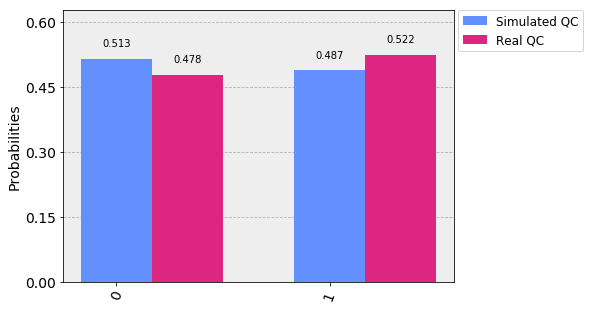

In [26]:
legend=['Simulated QC', 'Real QC']
plot_histogram([scounts, qcounts], legend=legend, bar_labels=True)

In [29]:
# =======================================
# B. Two-qubits Entanglement (bell state)
# =======================================
# 1st Entanglement (Bellstate) = ( |00> + |11>) / SQRT(2)
# initialization
qrE = QuantumRegister(2) #quantum registers 
crE = ClassicalRegister(2) #classical regiser
qcE = QuantumCircuit(qrE, crE) #create quantum circuit 
# qcE.draw()

In [30]:
# create 2 qubits engtanglement
qcE.h(qrE[0]) # apply Hadamard gate to put qubit 0 in superposition
qcE.cx(qrE[0], qrE[1]) # apply CNOT gate, qbit 0 controlling qubit 1
qcE.measure(qrE[0], crE[0]) #measure qubit 0, save result to classical register 0
qcE.measure(qrE[1], crE[1]) #measure qubit 1, save result to classical register 1
qcE.draw() #draw the circuit

In [31]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qcE, backend, shots=1024)
sresult = job.result()
scounts = result.get_counts()
print(scounts)

{'0': 525, '1': 499}


In [32]:
# processing quantum circuit on the real IBM Q Quantum Computer
IBMQ.load_accounts()
backend = providers.ibmq.least_busy(IBMQ.backends(simulator=False))
print("We'll use the least busy IBMQ device:", backend.name())
job = execute(qcE, backend)
qresult = job.result()
qcounts = qresult.get_counts()
print("Result from Real IBMQ Quantum Computer:", qcounts)

We'll use the least busy IBMQ device: ibmqx4
Result from Real IBMQ Quantum Computer: {'00': 410, '10': 80, '01': 90, '11': 444}


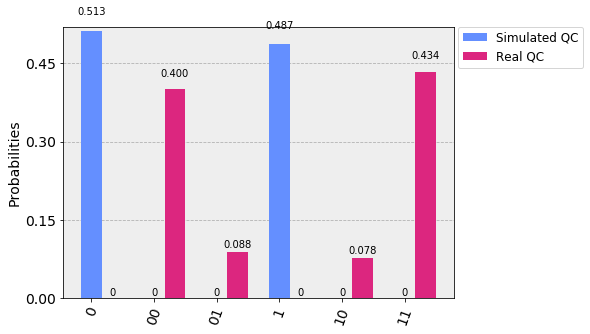

In [33]:
legend=['Simulated QC', 'Real QC']
plot_histogram([scounts, qcounts], legend=legend, bar_labels=True)

In [34]:
# 2nd Entanglement (Bellstate) = ( |01> + |10>) / SQRT(2)
# initialization
qrEb = QuantumRegister(2) #quantum registers 
crEb = ClassicalRegister(2) #classical regiser
qcEb = QuantumCircuit(qrEb, crEb) #create quantum circuit 
# qrb.draw()

In [35]:
# create 2 qubits engtanglement
qcEb.h(qrEb[0]) #apply Hadamard gate to put qubit 0 in superposition
qcEb.x(qrEb[1]) #apply X gate to qubit 1
qcEb.cx(qrEb[0], qrEb[1]) #apply CNOT gate, qbit 0 controlling qubit 1
qcEb.measure(qrEb[0], crEb[0]) #measure qubit 0, save result to classical register 0
qcEb.measure(qrEb[1], crEb[1]) #measure qubit 1, save result to classical register 1
qcEb.draw() #draw the circuit

In [36]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qcEb, backend, shots=1024)
sresult = job.result()
scounts = result.get_counts()
print(scounts)

{'0': 525, '1': 499}


In [37]:
# processing quantum circuit on the real IBM Q Quantum Computer
IBMQ.load_accounts()
backend = providers.ibmq.least_busy(IBMQ.backends(simulator=False))
print("We'll use the least busy IBMQ device:", backend.name())
job = execute(qcEb, backend)
qresult = job.result()
qcounts = qresult.get_counts()
print("Result from Real IBMQ Quantum Computer:", qcounts)

We'll use the least busy IBMQ device: ibmqx4
Result from Real IBMQ Quantum Computer: {'00': 102, '10': 419, '01': 488, '11': 15}


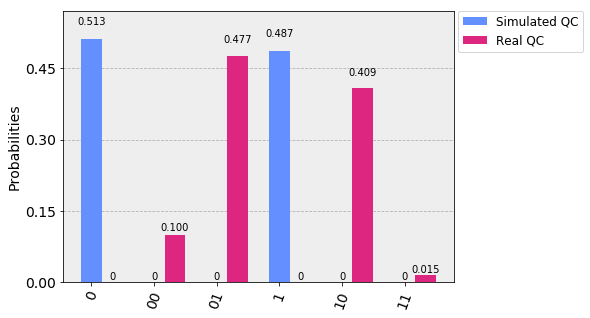

In [38]:
legend=['Simulated QC', 'Real QC']
plot_histogram([scounts, qcounts], legend=legend, bar_labels=True)